This is a slightly adapted notebook from an actual NLP project.

In [1]:
# Do not run this line more than once! Otherwise restart kernel
import os
print('Initial wdir: ' + os.getcwd())
os.chdir('../../../')
print('Current wdir: ' + os.getcwd())

Initial wdir: C:\Users\redur\OneDrive\Analytics Club\ForGit\ml-workflow\notebooks\Max_Muster\models_german
Current wdir: C:\Users\redur\OneDrive\Analytics Club\ForGit\ml-workflow


In [2]:
from src.utils.exploration import test_model, cross_validation
from src.utils.evaluation import plot_confusion_matrix, plot_learning_curve, auc_plot, wrongly_classified, print_metrics

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [3]:
data = pd.read_csv('./data/raw/train.csv')

In [4]:
X = data['text']
y = data['author']
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['author'], test_size=0.33, random_state=42)

In [10]:
list_model = [(Pipeline([('vect', CountVectorizer()),
                         ('multNB', MultinomialNB(alpha=0.22))]),
               'Naive Bayes'),
              (Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('multNB', MultinomialNB(alpha=0.03))]),
               'Naive Bayes with tfidf')]

############################################# 
 model: Naive Bayes 
#############################################
the list of steps and parameters in the pipeline

vect: CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

multNB: MultinomialNB(alpha=0.22, class_prior=None, fit_prior=True)

accuracy on test set: 
 0.8367378520581863 % 

accuracy on train set: 
 0.9375619425173439 % 

classification report: 
               precision    recall  f1-score   support

         EAP       0.86      0.81      0.83      2587
         HPL       0.85      0.84      0.85      1852
         MWS       0.80      0.87      0.83      2023

   micro avg       0.84      0.84      0.84    

<Figure size 432x288 with 0 Axes>

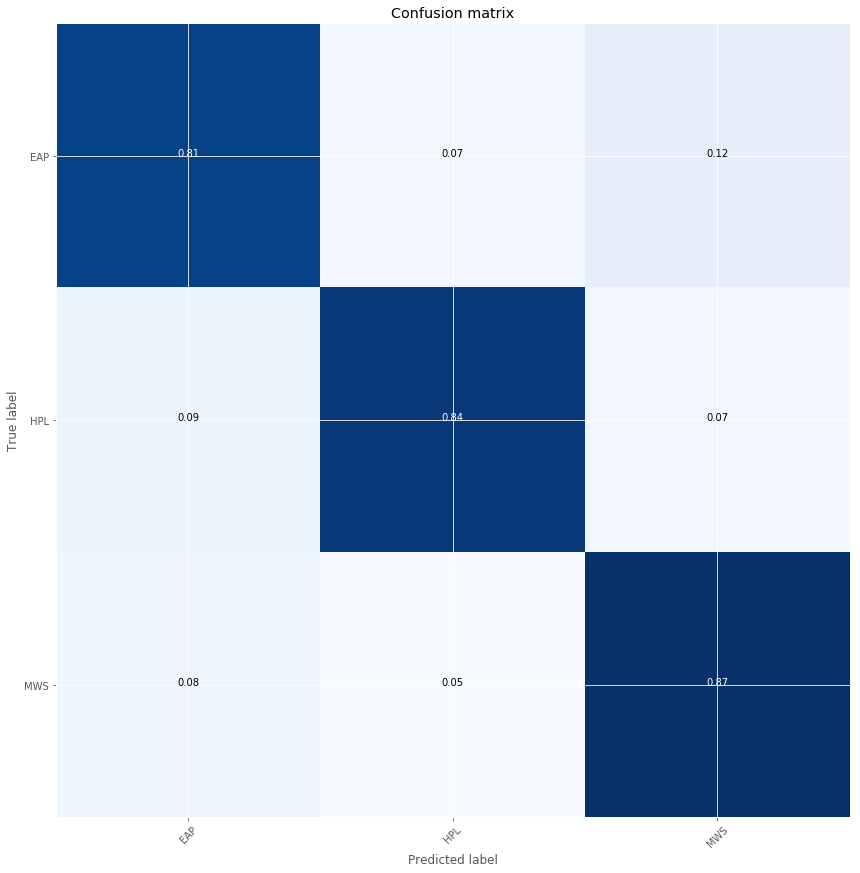

length of the vocabulary vector : 
21573 21573 

        term  count
19020  the    11641
13029  of     6835 
739    and    5805 
19290  to     4234 
9647   in     3049 
20926  was    2115 
19016  that   2089 
12458  my     1801 
10372  it     1618 
8680   had    1514 
21271  with   1511 
8869   he     1466 
9100   his    1351 
1137   as     1299 
7662   for    1159 
2536   but    1149 
21099  which  1097 
12809  not    1075 
1266   at     1024 
11758  me     1001 
7893   from   934  
2557   by     909  
10347  is     900  
19100  this   874  
13091  on     859  
1683   be     812  
21046  were   745  
9005   her    717  
8848   have   706  
21509  you    666  
                  term  count
10102  insupportable    0    
10106  insurrection     0    
10107  int              0    
10110  integrated       0    
10115  intellectuality  0    
10116  intellectually   0    
10118  intelligences    0    
10121  intemperance     0    
10128  intensest        0    
21572  υπνος            0    



<Figure size 432x288 with 0 Axes>

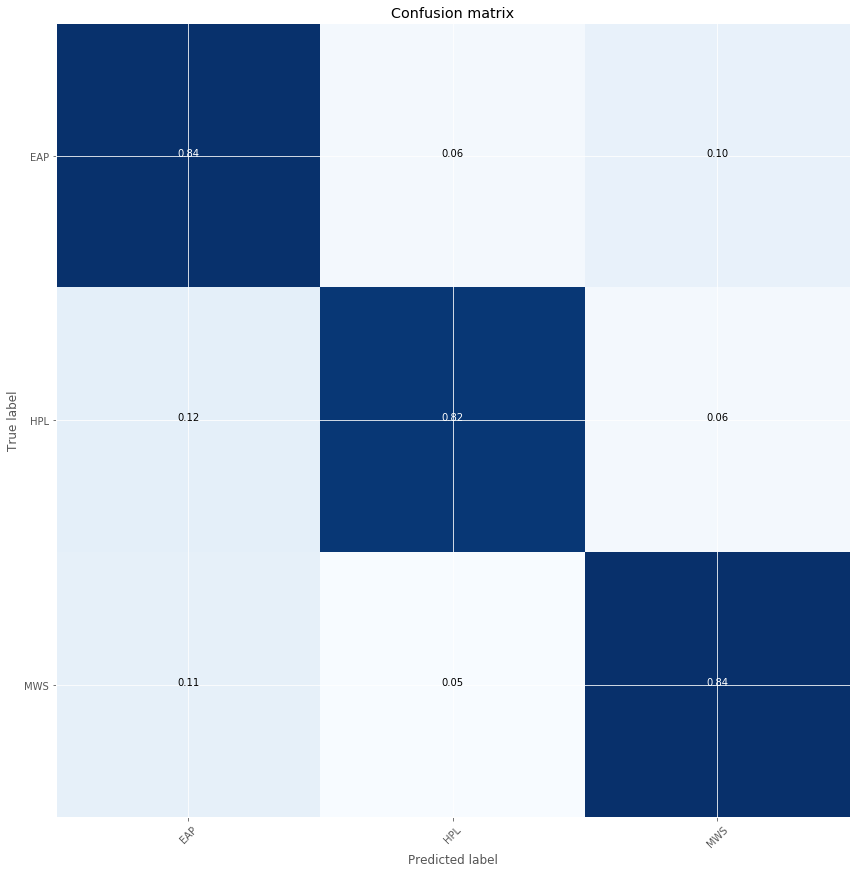

length of the vocabulary vector : 
21573 21573 

        term  count
19020  the    11641
13029  of     6835 
739    and    5805 
19290  to     4234 
9647   in     3049 
20926  was    2115 
19016  that   2089 
12458  my     1801 
10372  it     1618 
8680   had    1514 
21271  with   1511 
8869   he     1466 
9100   his    1351 
1137   as     1299 
7662   for    1159 
2536   but    1149 
21099  which  1097 
12809  not    1075 
1266   at     1024 
11758  me     1001 
7893   from   934  
2557   by     909  
10347  is     900  
19100  this   874  
13091  on     859  
1683   be     812  
21046  were   745  
9005   her    717  
8848   have   706  
21509  you    666  
                  term  count
10102  insupportable    0    
10106  insurrection     0    
10107  int              0    
10110  integrated       0    
10115  intellectuality  0    
10116  intellectually   0    
10118  intelligences    0    
10121  intemperance     0    
10128  intensest        0    
21572  υπνος            0    



In [12]:
for model in list_model:
    test_model(model[0], model[1], X_train, y_train, X_test, y_test, details=True, normalize=True)


# Cross Validation 

In [14]:
model_cv = Pipeline([('emb', CountVectorizer()),
                     ('ftrf', TfidfTransformer()),
                     ('clf', MultinomialNB(alpha=0.03))])

model_name = 'Naive Bayes with tfidf'

In [19]:
CountVectorizer?

In [20]:
param_grid = {"clf__alpha": [0.001, 0.01, 0.05, 0.1],
              "emb__min_df": [1, 10, 100, 1000]
         }


Grid Cross Validation for the model: Naive Bayes with tfidf
with parameters: 
clf__alpha: [0.001, 0.01, 0.05, 0.11]
emb__min_df: [1, 10, 100, 1000]
Number of Folds: 3


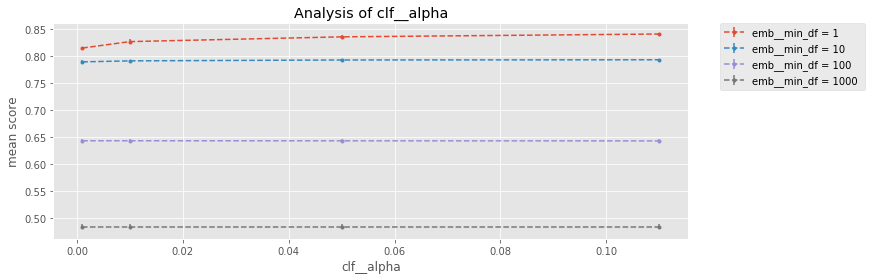

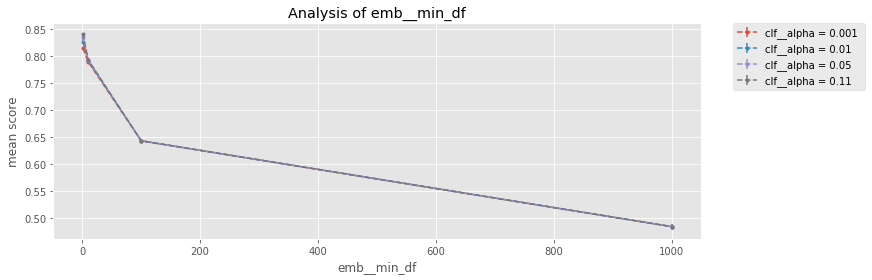


Best estimator: Pipeline(memory=None,
     steps=[('emb', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...near_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=0.11, class_prior=None, fit_prior=True))])
Best score: 0.8412584912406149

Best parameters:
clf__alpha: 0.11 
emb__min_df: 1
Time needed: 15.83098840713501s


In [21]:
cross_validation(model_cv, model_name, param_grid, X, y, folds=3, visualize=True, n_jobs=3)

#  Learning Curve

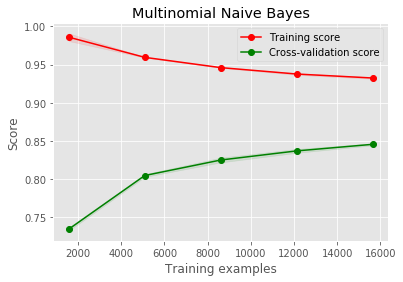

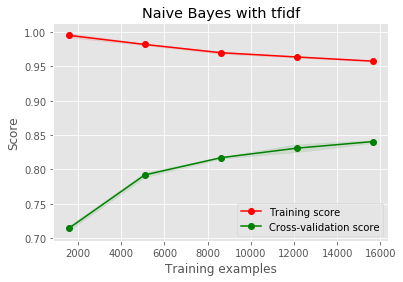

In [23]:
for model in list_model:
    plot_learning_curve(model[0], model[1], X, y, n_jobs=3, cv=5)

## Area under Curve

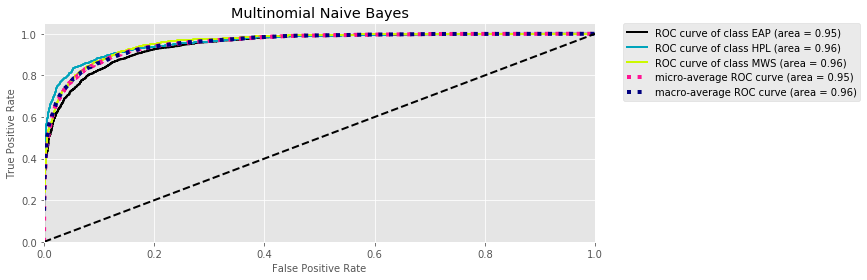

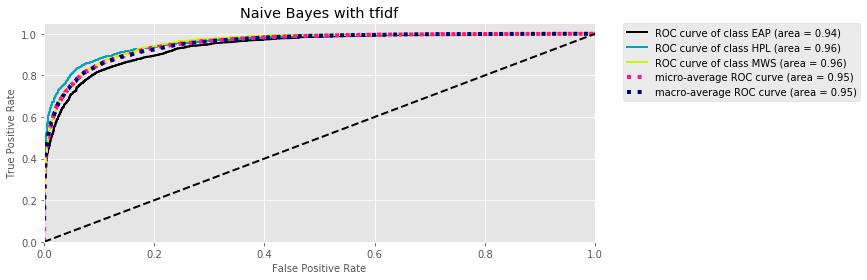

In [44]:
for model in list_model:
    auc_plot(model[0], model[1], X_test, y_test, x_train=X_train, y_train=y_train)

## Investigate wrongly classified data points

In [45]:
wrongly_classified(list_model[0][0], X_test, y_test, x_train=X_train, y_train=y_train)

,predicted_label,true_label,text
13435,EAP,HPL,"Over those horrors the evil moon now hung very low, but the puffy worms of the sea need no moon to feed by."
11277,HPL,EAP,"His chief amusements were gunning and fishing, or sauntering along the beach and through the myrtles, in quest of shells or entomological specimens; his collection of the latter might have been envied by a Swammerdamm."
8287,MWS,EAP,"I will content myself with saying, in addition, that my temperament is sanguine, rash, ardent, enthusiastic and that all my life I have been a devoted admirer of the women."
11993,MWS,EAP,But my efforts were fruitless.
18489,EAP,HPL,"John's, I bade the knocker enter, but was answered only by a shrill laugh."
1153,MWS,EAP,Impossible But let me hasten to the last eventful scene of the drama.
19122,HPL,MWS,Burke's Reflections on the French Revolution.
18539,EAP,MWS,"""My best girl,"" he had said, ""relieves me from these phantasies."
17156,EAP,HPL,"That I had previously overestimated our depth, I was sure; but none the less we must still be deep enough to make these phenomena remarkable."
7524,MWS,EAP,The prospect was sublime.


# Bayesian Optimization

In [46]:
from bayes_opt import BayesianOptimization
from matplotlib import gridspec
from sklearn.model_selection import cross_validate

In [47]:
# define the scoring function - cross validated score
def cv_score(model, X, y, scoring='accuracy', cv=3, n_jobs=3):
    val = cross_validate(model,
                         X,
                         y=y,
                         scoring=scoring,
                         cv=cv,
                         n_jobs=n_jobs)['test_score'].mean()
    return val

In [63]:
def NB_BO(clf__alpha):
    params = {"clf__alpha": clf__alpha}
    model = Pipeline([('emb', CountVectorizer()),
                     ('ftrf', TfidfTransformer()),
                     ('clf', MultinomialNB(alpha=clf__alpha))])
    score = cv_score(model, X, y, n_jobs=3)
    return score

In [74]:
SVC_BO = BayesianOptimization(NB_BO,
                             {"clf__alpha": (1e-4, 1)})

In [75]:
gp_params = {"alpha": 2e-5}
SVC_BO.maximize(n_iter=10, **gp_params, kappa=5)

Initialization
--------------------------------------------
 Step |   Time |      Value |   clf__alpha | 
    1 | 00m01s |    0.81873 |       0.6729 | 
    2 | 00m01s |    0.81526 |       0.7342 | 
    3 | 00m01s |    0.83722 |       0.2499 | 
    4 | 00m01s |    0.82400 |       0.5654 | 
    5 | 00m01s |    0.80791 |       0.8757 | 
Bayesian Optimization
--------------------------------------------
 Step |   Time |      Value |   clf__alpha | 
    6 | 00m02s |    0.80862 |       0.0001 | 
    7 | 00m02s |    0.83503 |       0.3190 | 
    8 | 00m03s |    0.83508 |       0.3223 | 
    9 | 00m03s |    0.83513 |       0.3249 | 
   10 | 00m03s |    0.83513 |       0.3286 | 
   11 | 00m03s |    0.80081 |       1.0000 | 
   12 | 00m04s |    0.83625 |       0.2885 | 
   13 | 00m04s |    0.83247 |       0.3827 | 
   14 | 00m04s |    0.83753 |       0.2458 | 
   15 | 00m05s |    0.83784 |       0.2389 | 
